### 필수과제
#### 인코딩
- 레이블 인코딩, 원핫 인코딩을 이용해서 타이타닉 데이터를 인코딩해주세요!
- 변수를 인코딩 쉽게 할 수 있는 것만 하는 게 아니라, 전처리를 배웠으니 전처리로 인코딩이 가능한 경우는 인코딩해주세요!

#### 스케일링
- 스케일링은 수치형 드릴 것
- 수치형 데이터의 변수들을 위에 배운 스케일링을 이용해서 실제값의 분포도와 기존의 오리지널 데이터 분포도 확인
- 로그 스케일링도 진행 꼭 해주세요!
- 정규성 검정하는 샤피로 테스트까지 진행해서 실제 통계적으로 변수가 정규성을 띄는지 확인해주세요!
- 구글링해서 진행(Shapiro-Wilks test <= 리서치하기)
- Shapiro에 대해서 리서치하고, 정리해서 요약 발표!

### 레이블 인코딩

In [1]:
import pandas as pd

In [2]:
titanic_df = pd.read_csv("train.csv") # 타이타닉 데이터 가져오기

In [3]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
from sklearn.preprocessing import LabelEncoder

# 객체 생성
label_encoder = LabelEncoder()

# 성별(Sex)에 대해 레이블 인코딩 수행
label_encoder.fit(titanic_df["Sex"])
labels = label_encoder.transform(titanic_df["Sex"])
labels_df = pd.DataFrame(data=labels, columns=["en1_Sex"])
titanic_df["en1_Sex"] = labels_df

- male : 1, female : 0으로 레이블 인코딩됨

In [22]:
# 객실 등급(Pclass)에 대해 레이블 인코딩 수행
label_encoder.fit(titanic_df["Pclass"])
labels = label_encoder.transform(titanic_df["Pclass"])
labels_df2 = pd.DataFrame(data=labels, columns=["en1_Pclass"])
titanic_df["en1_Pclass"] = labels_df2

- 객실 등급 1, 2, 3이 각각 0, 1, 2로 레이블 인코딩됨

In [6]:
# 객실 번호(Cabin)에 대해 레이블 인코딩 수행하고자 함
titanic_df["Cabin"].value_counts().to_frame() # 객실 번호는 알파벳-숫자 구성

,Cabin
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1
E36,1


In [7]:
import re

# 객실 번호의 알파벳만 추출해서 별도의 컬럼으로 지정
titanic_df["Cabin_a"] = titanic_df["Cabin"].str.extract("([A-Z]+)")

In [8]:
titanic_df["Cabin_a"].to_frame()

,Cabin_a
0,NaN
1,C
2,NaN
3,C
4,NaN
...,...
886,NaN
887,B
888,NaN
889,C


In [9]:
titanic_df["Cabin_a"].value_counts().to_frame()

,Cabin_a
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1


In [10]:
# 추출된 객실 번호(Cabin_a)에 대해 레이블 인코딩 수행
label_encoder.fit(titanic_df["Cabin_a"])
labels = label_encoder.transform(titanic_df["Cabin_a"])
labels_df3 = pd.DataFrame(data=labels, columns=["en1_Cabin_a"])
labels_df3

,en1_Cabin_a
0,8
1,2
2,8
3,2
4,8
...,...
886,8
887,1
888,8
889,2


In [11]:
labels_df3.value_counts().to_frame()

,0
en1_Cabin_a,
8,687
2,59
1,47
3,33
4,32
0,15
5,13
6,4
7,1


- A ~ T는 알파벳 순서대로 0 ~ 7, NaN은 8로 레이블 인코딩됨

### 원-핫 인코딩

In [23]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_a,en1_Sex,en1_Pclass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,0,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,1,0


In [13]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# 객체 생성
oh_encoder = OneHotEncoder()

# 승선한 항(Embarked)에 대해 원-핫 인코딩 수행
items = titanic_df["Embarked"]
items = np.array(items).reshape(-1,1)

oh_encoder.fit(items)
labels = oh_encoder.transform(items)
labels = labels.toarray()
labels

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

- Sklearn의 OneHotEncoder를 사용

In [14]:
# 생존 여부(Survived)에 대해 원-핫 인코딩 수행
oh_s = pd.get_dummies(titanic_df["Survived"])
oh_s

,0,1
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
886,1,0
887,0,1
888,1,0
889,0,1


In [15]:
pd.concat([titanic_df, oh_s], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_a,0,1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,0,1


In [16]:
# 추출된 객실 번호(Cabin_a)에 대해 원-핫 인코딩 수행
oh_c = pd.get_dummies(titanic_df["Cabin_a"])
oh_c

,A,B,C,D,E,F,G,T
0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0
887,0,1,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0
889,0,0,1,0,0,0,0,0


In [17]:
pd.concat([titanic_df, oh_c], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Cabin_a,A,B,C,D,E,F,G,T
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,NaN,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,C,0,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,NaN,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,C,0,0,1,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,S,NaN,0,0,0,0,0,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,S,B,0,1,0,0,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,S,NaN,0,0,0,0,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,C,C,0,0,1,0,0,0,0,0


In [24]:
titanic_df.to_csv("newdata.csv")

- NaN은 원-핫 인코딩되지 않음

### StandardScaler

In [18]:
df = pd.read_csv("pedalme_features.csv")

In [19]:
df

,Unnamed: 0,year,week,location,time,demand
0,15,2020,22,0,0,12
1,16,2020,22,1,0,2
2,17,2020,22,2,0,0
3,18,2020,22,3,0,1
4,19,2020,22,4,0,0
...,...,...,...,...,...,...
535,550,2021,5,10,35,2
536,551,2021,5,11,35,0
537,552,2021,5,12,35,0
538,553,2021,5,13,35,1


In [20]:
# 원본 데이터의 평균값, 분산값
print("feature들의 평균값")
print(df.mean())
print()
print("feature들의 분산값")
print(df.var())

feature들의 평균값
Unnamed: 0     284.500000
year          2020.138889
week            32.277778
location         7.000000
time            17.500000
demand          27.809259
dtype: float64

feature들의 분산값
Unnamed: 0    24345.000000
year              0.119821
week            207.807669
location         18.701299
time            108.116883
demand          960.625888
dtype: float64


In [24]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 객체 생성
std_scaler = StandardScaler()

# StandardScaler로 데이터셋 변환
std_scaler.fit(df)
scaled = std_scaler.transform(df)

# 데이터프레임으로 변환
df_scaled = pd.DataFrame(data=scaled, columns=df.columns)

# StandardScaler를 적용한 데이터의 평균값, 분산값
print("feature들의 평균값")
print(df_scaled.mean())
print()
print("feature들의 분산값")
print(df_scaled.var())

feature들의 평균값
Unnamed: 0   -2.138207e-17
year         -7.167929e-14
week         -6.636667e-16
location      0.000000e+00
time         -1.480297e-17
demand       -1.727014e-16
dtype: float64

feature들의 분산값
Unnamed: 0    1.001855
year          1.001855
week          1.001855
location      1.001855
time          1.001855
demand        1.001855
dtype: float64


- 평균값은 0, 분산값은 1에 가깝다

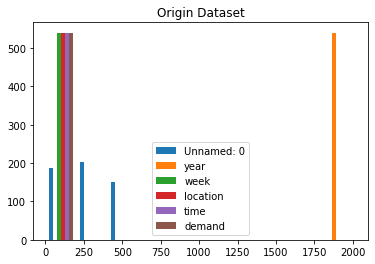

In [25]:
# 원본 데이터 시각화
plt.title("Origin Dataset")
plt.hist(df)
plt.legend(df.columns)

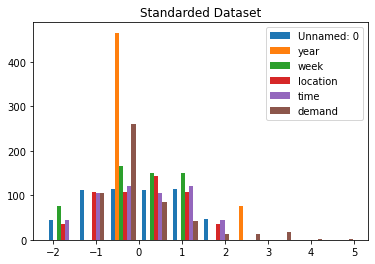

In [26]:
# StandardScaler를 적용한 데이터 시각화
plt.title("Standarded Dataset")
plt.hist(df_scaled)
plt.legend(df_scaled)

### Shapiro-Wilk Test
- 정규성을 검정할 때 사용
- H0(귀무가설) : 데이터의 모집단이 정규분포이다.
- p-value가 0.05 보다 작을 때 : (95%의 신뢰도로) 귀무가설 기각 => 데이터의 모집단이 정규분포라고 보기 어려움
- 그렇지 않을 때 : 데이터의 모집단이 정규분포라고 가정할 수 있음

In [52]:
# Shapiro-Wilk Test 예시
from numpy.random import randn

data = randn(100)
shapiro(data)

ShapiroResult(statistic=0.9923312664031982, pvalue=0.8446772694587708)

- p-value가 약 0.84 > 0.05
- 그러므로 (95%의 신뢰도로) 귀무가설을 기각하지 않음
- 데이터의 모집단이 정규분포일 것이다!
- 실제로 정규분포에서 데이터를 뽑았기 때문에 이와 같은 결과가 나옴

In [30]:
from scipy.stats import shapiro

# 원본 데이터 샤피로 테스트
print("year:", shapiro(df.year))
print("week:", shapiro(df.week))
print("location:", shapiro(df.location))
print("time:", shapiro(df.time))
print("demand:", shapiro(df.demand))

year: ShapiroResult(statistic=0.409584105014801, pvalue=1.506738186364013e-38)
week: ShapiroResult(statistic=0.9024496078491211, pvalue=4.427850669701442e-18)
location: ShapiroResult(statistic=0.9453430771827698, pvalue=3.225722911438106e-13)
time: ShapiroResult(statistic=0.95285564661026, pvalue=4.131200589951867e-12)
demand: ShapiroResult(statistic=0.7670989036560059, pvalue=5.850165124913813e-27)


In [31]:
# StandardScaler를 적용한 데이터 샤피로 테스트
print("year:", shapiro(df_scaled.year))
print("week:", shapiro(df_scaled.week))
print("location:", shapiro(df_scaled.location))
print("time:", shapiro(df_scaled.time))
print("demand:", shapiro(df_scaled.demand))

year: ShapiroResult(statistic=0.40958476066589355, pvalue=1.5068128755721614e-38)
week: ShapiroResult(statistic=0.9024494886398315, pvalue=4.4277038451427135e-18)
location: ShapiroResult(statistic=0.9453467130661011, pvalue=3.229544453045574e-13)
time: ShapiroResult(statistic=0.9528576135635376, pvalue=4.134114491710639e-12)
demand: ShapiroResult(statistic=0.767098605632782, pvalue=5.84998447268503e-27)


- 변수의 p-value가 전부 0에 가까움 (매우 작음) => 정규 분포라고 보기 어려움

### 로그 스케일링

In [41]:
# 로그 변환된 데이터
df_log = np.log1p(df)

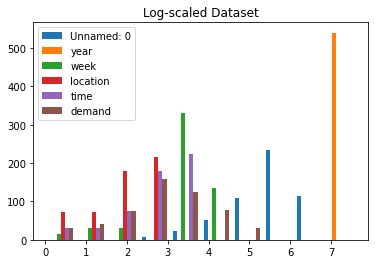

In [42]:
# 로그 변환된 데이터 시각화
plt.title("Log-scaled Dataset")
plt.hist(df_log)
plt.legend(df_log)

(array([285., 123.,  58.,  28.,  11.,  13.,  10.,  10.,   1.,   1.]),
 array([  0. ,  18.4,  36.8,  55.2,  73.6,  92. , 110.4, 128.8, 147.2,
        165.6, 184. ]),
 <BarContainer object of 10 artists>)

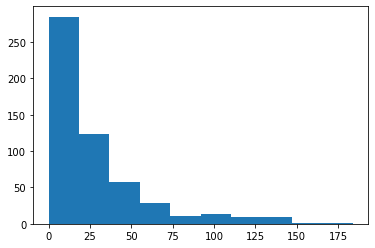

In [46]:
# demand 변수만 비교
plt.hist(df.demand)

(array([ 19.,  12.,  40.,  63.,  79., 103., 100.,  64.,  37.,  23.]),
 array([0.        , 0.52203558, 1.04407117, 1.56610675, 2.08814233,
        2.61017791, 3.1322135 , 3.65424908, 4.17628466, 4.69832024,
        5.22035583]),
 <BarContainer object of 10 artists>)

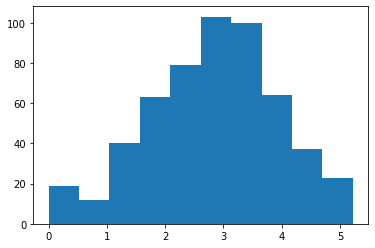

In [45]:
plt.hist(df_log.demand)

- 로그 스케일링 후 정규분포에 가까운 모양으로 변함

In [43]:
# 로그 변환된 데이터 샤피로 테스트
print("year:", shapiro(df_log.year))
print("week:", shapiro(df_log.week))
print("location:", shapiro(df_log.location))
print("time:", shapiro(df_log.time))
print("demand:", shapiro(df_log.demand))

year: ShapiroResult(statistic=0.38638460636138916, pvalue=4.477194836367113e-39)
week: ShapiroResult(statistic=0.6839447021484375, pvalue=1.59541441101512e-30)
location: ShapiroResult(statistic=0.877497673034668, pvalue=3.2011663523603426e-20)
time: ShapiroResult(statistic=0.8648099303245544, pvalue=3.4576941242412164e-21)
demand: ShapiroResult(statistic=0.9805212020874023, pvalue=1.2890114930996788e-06)


- demand 변수의 경우 p-value가 여전히 작지만, 전에 비해 좀 더 커짐
- 나머지 변수는 p-value 값이 더 작아짐

In [51]:
# demand가 0인 경우 제외
df_0 = df[df.demand != 0]
df_0_log = np.log1p(df_0)

# 0값 제외, 로그 변환된 데이터 샤피로 테스트
print("demand:", shapiro(df_0_log.demand))

demand: ShapiroResult(statistic=0.9888311624526978, pvalue=0.0005245243664830923)


- demand 변수의 p-value가 조금 더 커짐

### MinMaxScaler

In [54]:
from sklearn.preprocessing import MinMaxScaler

# 객체 생성
mm_scaler = MinMaxScaler()

# MinMaxScaler로 데이터셋 변환
mm_scaler.fit(df)
scaled = mm_scaler.transform(df)

# 데이터프레임으로 변환
df_scaled = pd.DataFrame(data=scaled, columns=df.columns)

# MinMaxScaler를 적용한 데이터의 최솟값, 최댓값
print("feature들의 최솟값")
print(df_scaled.min())
print()
print("feature들의 최댓값")
print(df_scaled.max())

feature들의 최솟값
Unnamed: 0    0.0
year          0.0
week          0.0
location      0.0
time          0.0
demand        0.0
dtype: float64

feature들의 최댓값
Unnamed: 0    1.0
year          1.0
week          1.0
location      1.0
time          1.0
demand        1.0
dtype: float64


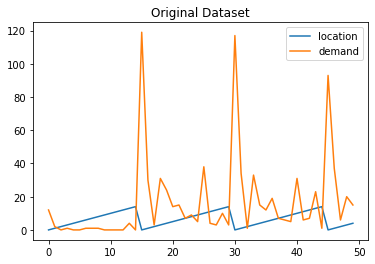

In [75]:
# 원본 데이터 시각화
plt.title("Original Dataset")
plt.plot(df[["location","demand"]].head(50))
plt.legend(["location","demand"])

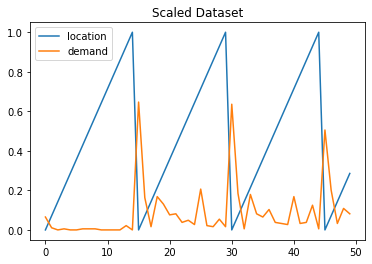

In [76]:
# MinMaxScaler를 적용한 데이터 시각화
plt.title("Scaled Dataset")
plt.plot(df_scaled[["location","demand"]].head(50))
plt.legend(["location","demand"])

### MaxAbsScaler

In [77]:
from sklearn.preprocessing import MaxAbsScaler

# 객체 생성
ma_scaler = MaxAbsScaler()

# MaxAbsScaler로 데이터셋 변환
ma_scaler.fit(df)
scaled = ma_scaler.transform(df)

# 데이터프레임으로 변환
df_scaled = pd.DataFrame(data=scaled, columns=df.columns)

# MaxAbsScaler를 적용한 데이터의 최솟값, 최댓값
print("feature들의 최솟값")
print(df_scaled.min())
print()
print("feature들의 최댓값")
print(df_scaled.max())

feature들의 최솟값
Unnamed: 0    0.027076
year          0.999505
week          0.019231
location      0.000000
time          0.000000
demand        0.000000
dtype: float64

feature들의 최댓값
Unnamed: 0    1.0
year          1.0
week          1.0
location      1.0
time          1.0
demand        1.0
dtype: float64


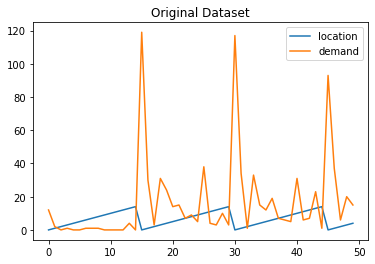

In [78]:
# 원본 데이터 시각화
plt.title("Original Dataset")
plt.plot(df[["location","demand"]].head(50))
plt.legend(["location","demand"])

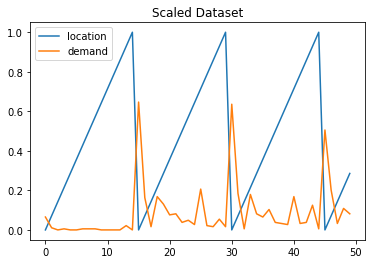

In [79]:
# MaxAbsScaler를 적용한 데이터 시각화
plt.title("Scaled Dataset")
plt.plot(df_scaled[["location","demand"]].head(50))
plt.legend(["location","demand"])

- MinMaxScaler랑 거의 똑같이 나옴

### RobustScaler

In [80]:
from sklearn.preprocessing import RobustScaler

# 객체 생성
robust_scaler = RobustScaler()

# RobustScaler로 데이터셋 변환
robust_scaler.fit(df)
scaled = robust_scaler.transform(df)

# 데이터프레임으로 변환
df_scaled = pd.DataFrame(data=scaled, columns=df.columns)

# RobustScaler를 적용한 데이터의 최솟값, 최댓값
print("feature들의 최솟값")
print(df_scaled.min())
print()
print("feature들의 최댓값")
print(df_scaled.max())

feature들의 최솟값
Unnamed: 0   -1.000000
year          0.000000
week         -1.914286
location     -0.875000
time         -1.000000
demand       -0.592593
dtype: float64

feature들의 최댓값
Unnamed: 0    1.000000
year          1.000000
week          1.000000
location      0.875000
time          1.000000
demand        6.222222
dtype: float64


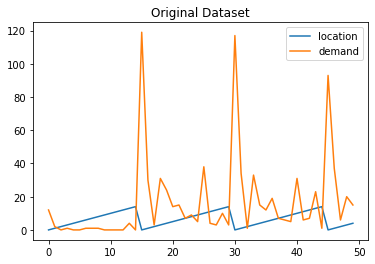

In [81]:
# 원본 데이터 시각화
plt.title("Original Dataset")
plt.plot(df[["location","demand"]].head(50))
plt.legend(["location","demand"])

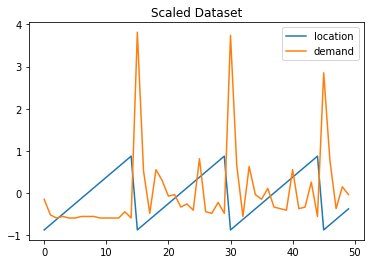

In [82]:
# RobustScaler를 적용한 데이터 시각화
plt.title("Scaled Dataset")
plt.plot(df_scaled[["location","demand"]].head(50))
plt.legend(["location","demand"])

### Normalizer

In [83]:
from sklearn.preprocessing import Normalizer

# 객체 생성
norm_scaler = Normalizer()

# Normalizer로 데이터셋 변환
norm_scaler.fit(df)
scaled = norm_scaler.transform(df)

# 데이터프레임으로 변환
df_scaled = pd.DataFrame(data=scaled, columns=df.columns)

# Normalizer를 적용한 데이터의 최솟값, 최댓값
print("feature들의 최솟값")
print(df_scaled.min())
print()
print("feature들의 최댓값")
print(df_scaled.max())

feature들의 최솟값
Unnamed: 0    0.007425
year          0.964263
week          0.000481
location      0.000000
time          0.000000
demand        0.000000
dtype: float64

feature들의 최댓값
Unnamed: 0    0.264325
year          0.999909
week          0.025071
location      0.006929
time          0.016729
demand        0.089616
dtype: float64


In [86]:
df_scaled

,Unnamed: 0,year,week,location,time,demand
0,0.007425,0.999895,0.010890,0.000000,0.000000,0.005940
1,0.007920,0.999909,0.010890,0.000495,0.000000,0.000990
2,0.008415,0.999905,0.010890,0.000990,0.000000,0.000000
3,0.008910,0.999900,0.010890,0.001485,0.000000,0.000495
4,0.009405,0.999895,0.010890,0.001980,0.000000,0.000000
...,...,...,...,...,...,...
535,0.262552,0.964758,0.002387,0.004774,0.016708,0.000955
536,0.262996,0.964635,0.002387,0.005250,0.016706,0.000000
537,0.263439,0.964511,0.002386,0.005727,0.016704,0.000000
538,0.263882,0.964387,0.002386,0.006203,0.016701,0.000477


- Normalizer가 행마다 적용됨